In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from dateutil import parser
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt

import glob
# import plotly.express as px

In [3]:
from manofunkcijos import *

In [ ]:
# pip install pandas

In [4]:
# default importai nuo šiandien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [4]:
# duomenu nuskaitymas
nypd = pd.read_csv('DATA/NYPD.csv', parse_dates = {'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(2)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.81056,POINT (-73.81055977899997 40.587663570000075)
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.90879,POINT (-73.90879049699998 40.68164709200005)


In [5]:
nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23865 entries, 0 to 23864
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     23865 non-null  datetime64[ns]
 1   INCIDENT_KEY             23865 non-null  int64         
 2   BORO                     23865 non-null  object        
 3   PRECINCT                 23865 non-null  int64         
 4   JURISDICTION_CODE        23863 non-null  float64       
 5   LOCATION_DESC            10122 non-null  object        
 6   STATISTICAL_MURDER_FLAG  23865 non-null  bool          
 7   PERP_AGE_GROUP           15236 non-null  object        
 8   PERP_SEX                 15270 non-null  object        
 9   PERP_RACE                15270 non-null  object        
 10  VIC_AGE_GROUP            23865 non-null  object        
 11  VIC_SEX                  23865 non-null  object        
 12  VIC_RACE                 23865 n

In [6]:
# pandas grupavimas
# groupby ir get_group, groups.keys()

nypd_boro = nypd.groupby('BORO')
print(nypd_boro)

In [7]:
nypd_boro.groups.keys()

dict_keys(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'])

In [8]:
nypd_boro.get_group('BRONX')

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
4,2021-03-30 22:23:00,226320600,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004)
5,2021-03-30 02:25:00,226321041,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1004227,237572,40.818742,-73.927827,POINT (-73.92782678799993 40.818741576000036)
11,2021-03-28 15:15:00,226230155,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1008778,253049,40.861210,-73.911328,POINT (-73.91132794299993 40.86120995700002)
13,2021-03-28 21:15:00,226230156,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1009909,241902,40.830612,-73.907282,POINT (-73.90728181399999 40.83061151500005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,2006-01-05 19:12:00,10038632,BRONX,41,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1011607,236142,40.814797,-73.901170,POINT (-73.90116952199998 40.81479685700003)
23844,2006-01-05 15:06:00,10038631,BRONX,52,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1012694,254136,40.864182,-73.897166,POINT (-73.89716623799995 40.864181694000074)
23848,2006-01-04 19:17:00,10038630,BRONX,42,0.0,FAST FOOD,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1010158,242491,40.832227,-73.906380,POINT (-73.90637976999993 40.832227424000045)
23862,2006-01-01 05:51:00,9953246,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [9]:

nb_flag = nypd.groupby(['BORO', 'STATISTICAL_MURDER_FLAG'])
nb_flag.groups.keys()

dict_keys([('BRONX', False), ('BRONX', True), ('BROOKLYN', False), ('BROOKLYN', True), ('MANHATTAN', False), ('MANHATTAN', True), ('QUEENS', False), ('QUEENS', True), ('STATEN ISLAND', False), ('STATEN ISLAND', True)])

In [10]:
nb_flag.get_group(('BRONX', False))

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
5,2021-03-30 02:25:00,226321041,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1004227,237572,40.818742,-73.927827,POINT (-73.92782678799993 40.818741576000036)
11,2021-03-28 15:15:00,226230155,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1008778,253049,40.861210,-73.911328,POINT (-73.91132794299993 40.86120995700002)
13,2021-03-28 21:15:00,226230156,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1009909,241902,40.830612,-73.907282,POINT (-73.90728181399999 40.83061151500005)
16,2021-03-27 02:23:00,226203718,BRONX,52,0.0,NaN,False,NaN,NaN,NaN,25-44,F,WHITE HISPANIC,1018052,257046,40.872150,-73.877781,POINT (-73.87778049799994 40.87214986200007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,2006-01-05 19:12:00,10038632,BRONX,41,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1011607,236142,40.814797,-73.901170,POINT (-73.90116952199998 40.81479685700003)
23844,2006-01-05 15:06:00,10038631,BRONX,52,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1012694,254136,40.864182,-73.897166,POINT (-73.89716623799995 40.864181694000074)
23848,2006-01-04 19:17:00,10038630,BRONX,42,0.0,FAST FOOD,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1010158,242491,40.832227,-73.906380,POINT (-73.90637976999993 40.832227424000045)
23862,2006-01-01 05:51:00,9953246,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [11]:
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075)
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)


In [12]:
nypd['V'] = nypd['DATA'].dt.hour
nypd.head(5)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,V
0,2021-03-30 23:45:00,226323781,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075),23
1,2021-03-30 16:20:00,226323779,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005),16
2,2021-03-30 23:15:00,226323782,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006),23
3,2021-03-30 13:35:00,226321042,MANHATTAN,7,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.721822,-73.987479,POINT (-73.98747935099993 40.72182201900005),13
4,2021-03-30 22:23:00,226320600,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004),22


In [27]:
nypdII = nypd[['DATA','V', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypdII.head(3)

,DATA,V,BORO,STATISTICAL_MURDER_FLAG
0,2021-03-30 23:45:00,23,QUEENS,False
1,2021-03-30 16:20:00,16,BROOKLYN,False
2,2021-03-30 23:15:00,23,BRONX,False


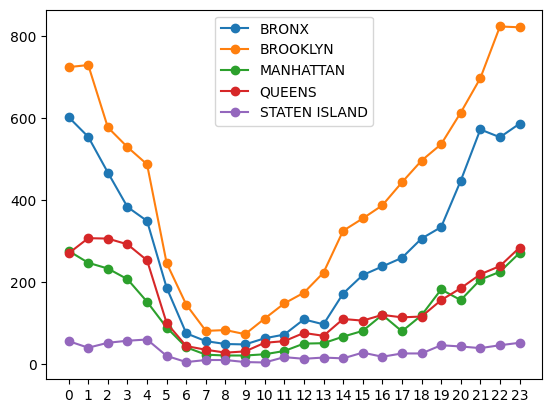

In [13]:
nypd = pd.read_csv('DATA/NYPD.csv', parse_dates = {'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd['V'] = nypd['DATA'].dt.hour
nypdII = nypd[['DATA','V', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_boro = nypdII.groupby('BORO')
fig, axis = plt.subplots()
boros = nypd_boro.groups.keys()
for boro in boros:
    b = nypd_boro.get_group(boro)
    h = b['V'].value_counts().sort_index(ascending=True)
    axis.plot(h.index, h.values, label = boro, marker ='o')
axis.set_xticks(h.index)
axis.legend(loc='best')
plt.show()

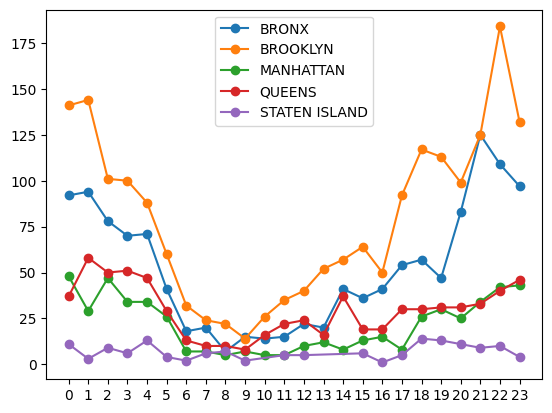

[('BROOKLYN', False), ('BRONX', False), ('QUEENS', False), ('MANHATTAN', False), ('BROOKLYN', True), ('BRONX', True), ('QUEENS', True), ('STATEN ISLAND', False), ('MANHATTAN', True), ('STATEN ISLAND', True)]
[np.int64(7914), np.int64(5527), np.int64(2861), np.int64(2454), np.int64(1912), np.int64(1267), np.int64(707), np.int64(557), np.int64(520), np.int64(146)]


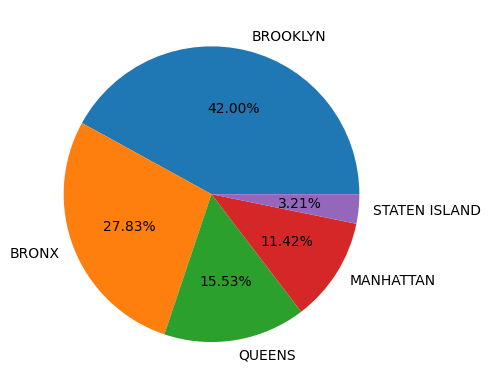

BORO           STATISTICAL_MURDER_FLAG
BROOKLYN       False                      7914
BRONX          False                      5527
QUEENS         False                      2861
MANHATTAN      False                      2454
BROOKLYN       True                       1912
BRONX          True                       1267
QUEENS         True                        707
STATEN ISLAND  False                       557
MANHATTAN      True                        520
STATEN ISLAND  True                        146
Name: count, dtype: int64
['BROOKLYN', 'BRONX', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND']
[np.int64(1912), np.int64(1267), np.int64(707), np.int64(520), np.int64(146)]


In [14]:
# Atvaizduokite grafiką, kuriame būtų tik mirtinų susiškaudymų kiekiai per valandą kiekviename rajone. Panaudokite plot() grafiką.
nypd = pd.read_csv('DATA/NYPD.csv', parse_dates = {'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd['V'] = nypd['DATA'].dt.hour
nypdII = nypd[['DATA','V', 'BORO', 'STATISTICAL_MURDER_FLAG']]
l = nypdII[nypdII['STATISTICAL_MURDER_FLAG'] == True]
nypd_boro = l.groupby('BORO')
fig, axis = plt.subplots()
boros = nypd_boro.groups.keys()
valandos = np.arange(0,24)
for boro in boros:
    b = nypd_boro.get_group(boro)
    h = b['V'].value_counts().sort_index(ascending=True)
    axis.plot(h.index, h.values, label = boro, marker ='o')
axis.set_xticks(valandos)
axis.legend(loc='best')
plt.show()
# Su pie plot atvaizduokite, kiek mirtinų nusišaudymų tenka kiekvienam rajonui.
q = nypdII[['BORO', 'STATISTICAL_MURDER_FLAG']].value_counts()
indeksai = list(q.index)
kiekiai = list(q.values)

print(indeksai)
print(kiekiai)
ni = []
kiek = []

for i, k in zip(indeksai,kiekiai):
    if i[1] == True:
        ni.append(i[0])
        kiek.append(k)
plt.pie(x=kiek, labels=ni, autopct='%.2f%%')
plt.show()
print(q)
print(ni)
print(kiek)

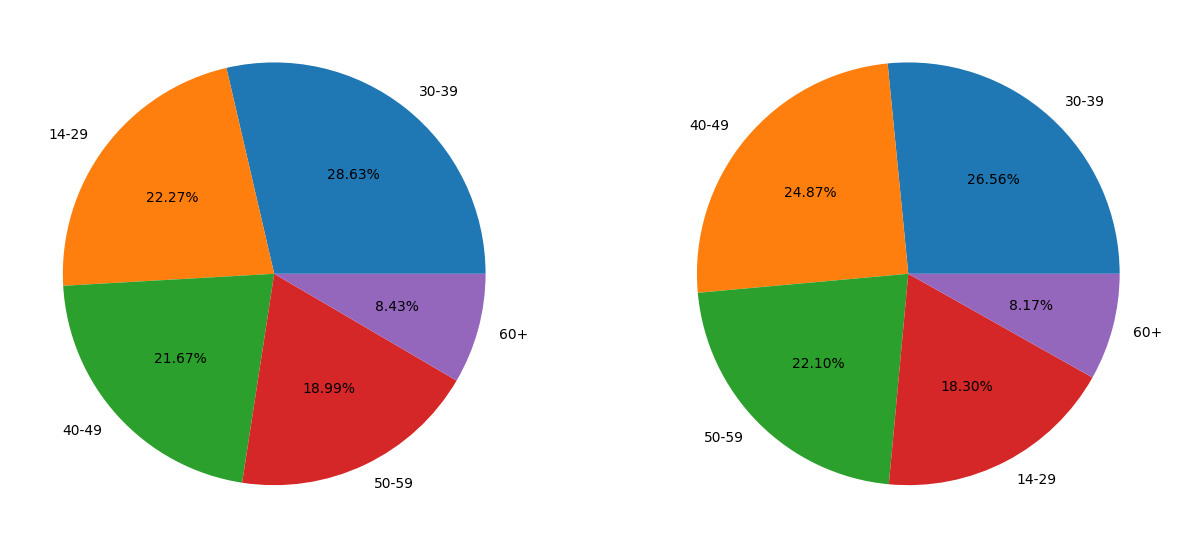

In [15]:
# Atrinkite 2018 metais vyrus, moteris, uždirbusius daugiau nei bendras vidutinis atlyginimas,
# surūšiuokite pagal amžiaus grupes ir atvaizduokite procentinį pasiskirstymą su pie plot. 
# Vyrus, moteris atskiruose pie plotuose.
dus2018 = pd.read_csv('DATA/DUS2018.csv')
du = dus2018[['amzius','lytis','bdu_spalio']]
du.head(2)
vid_du = du['bdu_spalio'].mean()

vyr_l = du[du['lytis'] == "M"]
mot_l = du[du['lytis'] == 'F']
vdu = vyr_l[vyr_l['bdu_spalio'] > vid_du]
mdu = mot_l[mot_l['bdu_spalio'] > vid_du]

amziai_vyr = vdu['amzius'].value_counts()
amziai_mot = mdu['amzius'].value_counts()


fig, axes = plt.subplots(1,2, figsize = [15,10])

axes[0].pie(x=amziai_vyr.values, labels=amziai_vyr.index, autopct='%.2f%%')
axes[1].pie(x=amziai_mot.values, labels=amziai_mot.index, autopct='%.2f%%')
plt.show()

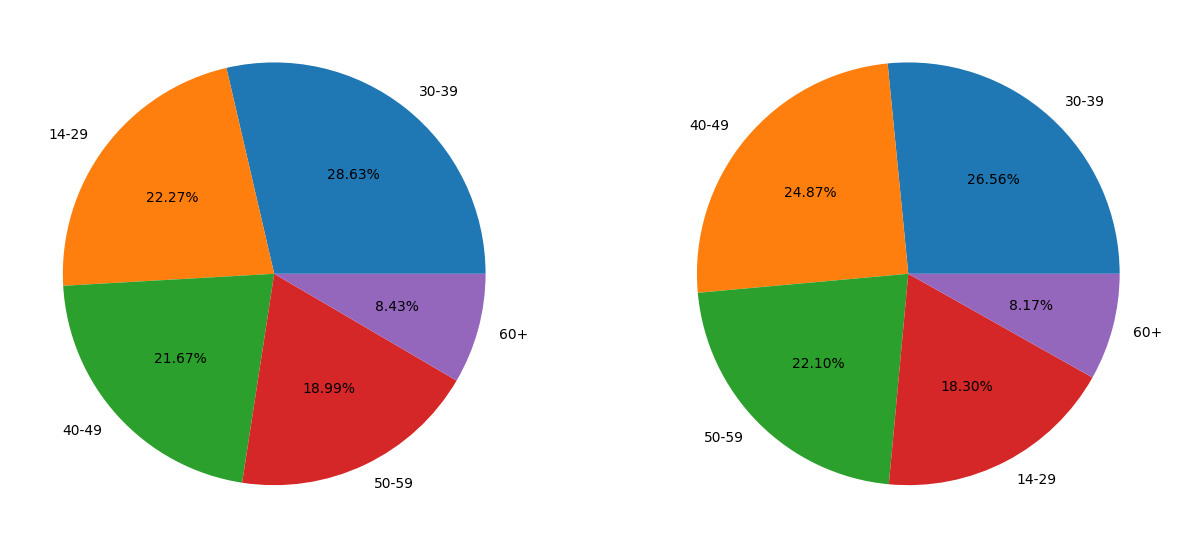

In [88]:
fig, axes = plt.subplots(1,2, figsize = [15,10])

axes[0].pie(x=amziai_vyr.values, labels=amziai_vyr.index, autopct='%.2f%%')
axes[1].pie(x=amziai_mot.values, labels=amziai_mot.index, autopct='%.2f%%')
plt.show()

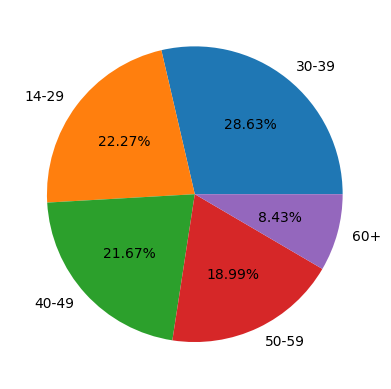

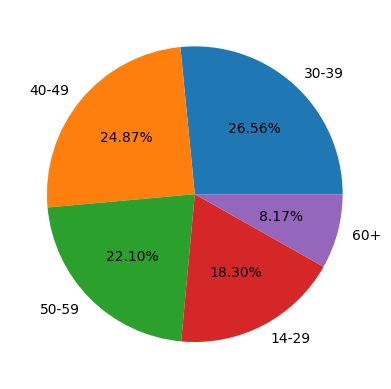

In [16]:
dus2018 = pd.read_csv('DATA/DUS2018.csv')
du = dus2018[['amzius','lytis','bdu_spalio']]
du.head(2)
vid_du = du['bdu_spalio'].mean()

vyr_l = du[du['lytis'] == "M"]
mot_l = du[du['lytis'] == 'F']
vdu = vyr_l[vyr_l['bdu_spalio'] > vid_du]
mdu = mot_l[mot_l['bdu_spalio'] > vid_du]

amziai_vyr = vdu['amzius'].value_counts()
amziai_mot = mdu['amzius'].value_counts()
# plt.subplots(1,2, figsize = [15,10])

plt.pie(x=amziai_vyr.values, labels=amziai_vyr.index, autopct='%.2f%%')

plt.show()

plt.pie(x=amziai_mot.values, labels=amziai_mot.index, autopct='%.2f%%')

plt.show()

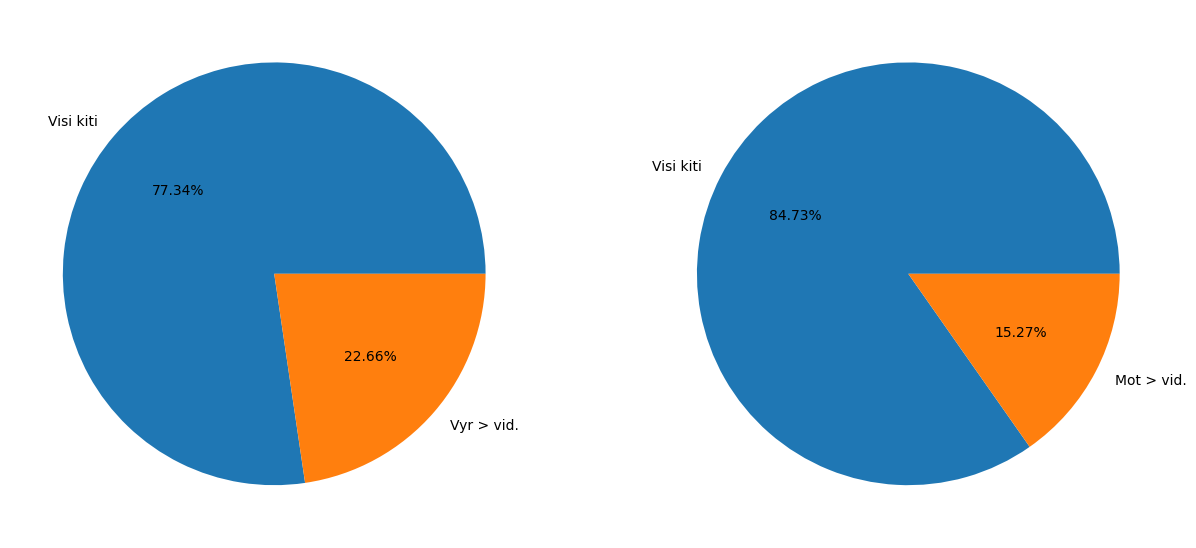

In [44]:
# 1) parodykite, kiek % moterų, vyrų nuo visos imties uždirba daugiau, nei vidurkis
dus2018 = pd.read_csv('DATA/DUS2018.csv')
du = dus2018[['amzius','lytis','bdu_spalio']]
du.head(2)
vid_du = du['bdu_spalio'].mean()

vyr_amziai = []
mot_amziai = []

for am, fdu, lyt in zip(du['amzius'], du['bdu_spalio'], du['lytis']):
    if fdu > vid_du and lyt == 'M':
        vyr_amziai.append("Vyr > vid.")
    else:
        vyr_amziai.append('Visi kiti')

for am, fdu, lyt in zip(du['amzius'], du['bdu_spalio'], du['lytis']):
    if fdu > vid_du and lyt == 'F':
        mot_amziai.append("Mot > vid.")
    else:
        mot_amziai.append('Visi kiti')


du['Vyr_amziai'] = vyr_amziai
du['Mot_amziai'] = mot_amziai
amziai_vyr = du['Vyr_amziai'].value_counts()
amziai_mot = du['Mot_amziai'].value_counts()
fig, axes = plt.subplots(1,2, figsize = [15,10])

axes[0].pie(x=amziai_vyr.values, labels=amziai_vyr.index, autopct='%.2f%%')
axes[1].pie(x=amziai_mot.values, labels=amziai_mot.index, autopct='%.2f%%')
plt.show()

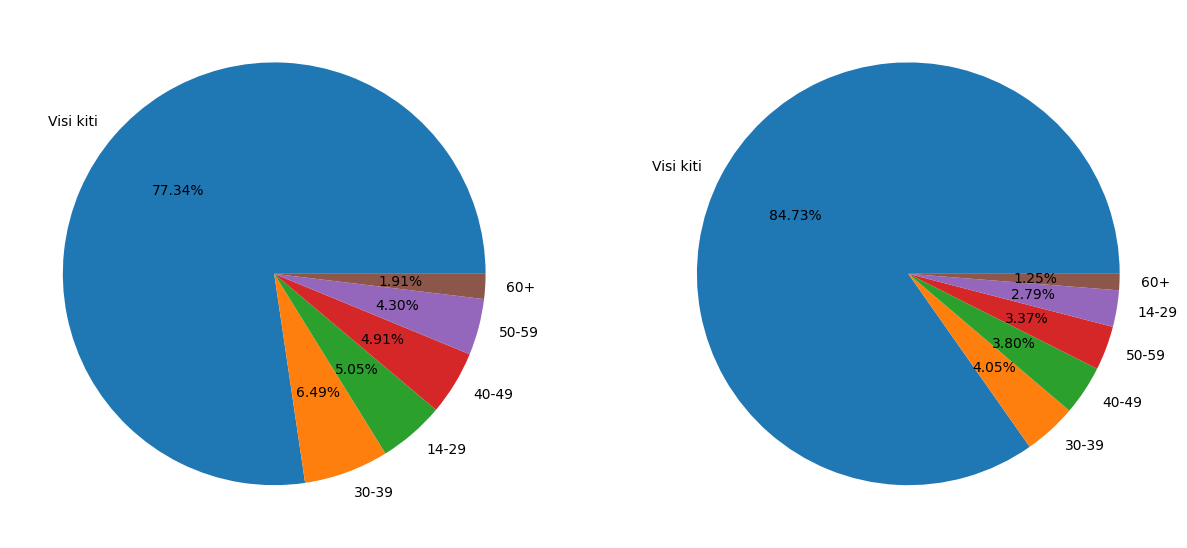

In [48]:
# 2) atsižvelkite į amžiaus grupes, irgi lyginame su visa imtimi kiekvieną amžiaus grupę
dus2018 = pd.read_csv('DATA/DUS2018.csv')
du = dus2018[['amzius','lytis','bdu_spalio']]
du.head(2)
vid_du = du['bdu_spalio'].mean()



vyr_amziai = []

for am, fdu, lyt in zip(du['amzius'], du['bdu_spalio'], du['lytis']):
    if fdu > vid_du and lyt == 'M':
        vyr_amziai.append(am)
    else:
        vyr_amziai.append('Visi kiti')

mot_amziai = []


for am, fdu, lyt in zip(du['amzius'], du['bdu_spalio'], du['lytis']):
    if fdu > vid_du and lyt == 'F':
        mot_amziai.append(am)
    else:
        mot_amziai.append('Visi kiti')


du['Vyr'] = vyr_amziai
du['Mot'] = mot_amziai
amziai_vyr = du['Vyr'].value_counts()
amziai_mot = du['Mot'].value_counts()
fig, axes = plt.subplots(1,2, figsize = [15,10])

axes[0].pie(x=amziai_vyr.values, labels=amziai_vyr.index, autopct='%.2f%%')
axes[1].pie(x=amziai_mot.values, labels=amziai_mot.index, autopct='%.2f%%')
plt.show()